Nama:

In [1]:
print('jasman')

jasman


In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip freeze > requirements.txt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv("employee.csv")
df.head()

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5
1,1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10,7,1,7
2,2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,...,2,80,0,7,3,3,0,0,0,0
3,3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8,7,3,0
4,4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2,2,2,2


## Dataset :

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

# EDA

(1) Drop semua kolom yang tidak diperlukan pada data employee.csv. Lakukan EDA univariat untuk setiap kolom numerik pada employee.csv yang mencakup:<p>
    a. histogram dan boxplot untuk tiap kolom<p>
    b. metrik statistik dasar untuk tiap kolom: mean, std, min, q1, q2, q3, iqr, max<p>
    c. identifikasi nilai upper whisker dan lower whisker dari boxplot tiap kolom<p>
    d. apabila terdapat outlier (<q1-1.5*iqr | >q3+1.5*iqr): hitung count, proportion, dan list dari outlier tiap kolom<p>
        e. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

In [4]:
df.columns = df.columns.str.strip()
df_1 = df.drop(columns=['Unnamed: 0', 'EmployeeNumber'], errors='ignore' )
df_1.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


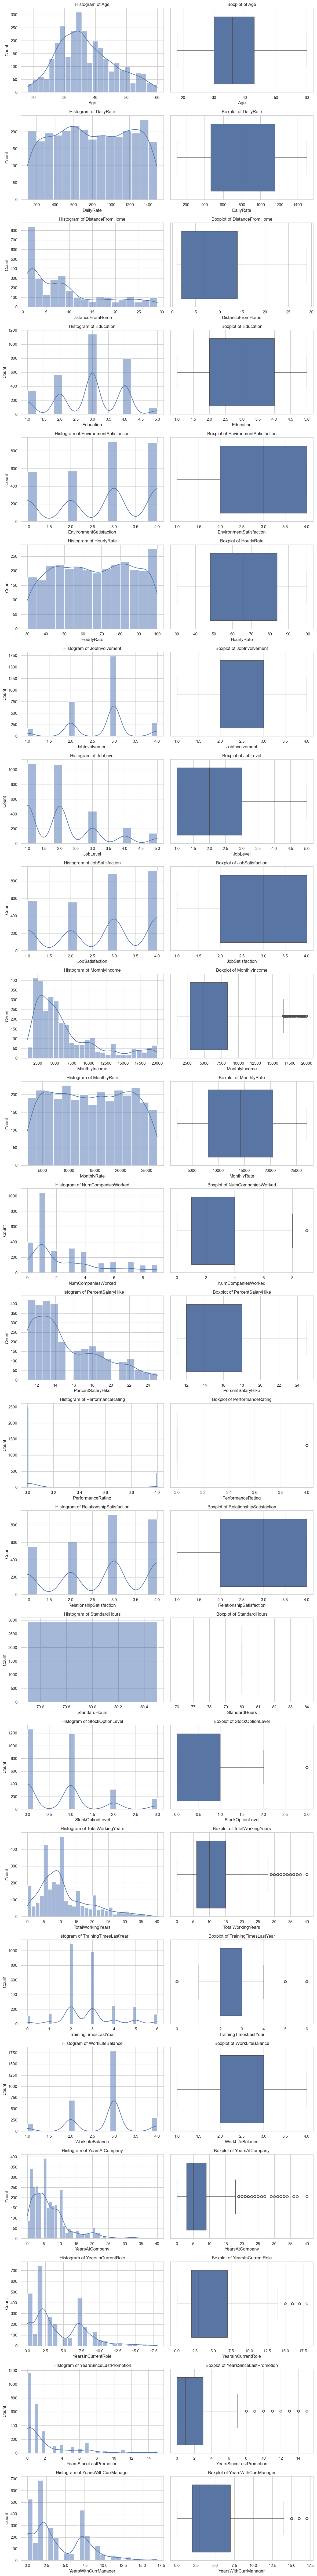

In [ ]:
# making histogram and boxplot all columns

numeric_columns = df_1.select_dtypes(include="number").columns
categorical_columns = df_1.select_dtypes(exclude="number").columns.drop("Attrition")
n = len(numeric_columns)


fig, ax = plt.subplots(n, 2, figsize=(12, 4 * n))

for i, col in enumerate(numeric_columns):
    sns.histplot(df_1[col], kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df_1[col], ax=ax[i, 1])
    ax[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()
    

In [92]:
df[numeric_columns].describe(include="all")

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#Outlier indentification
total_rows = df_1.shape[0]

for col in numeric_columns:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier = df_1[
        (df_1[col] < Q1 - 1.5 * IQR) |
        (df_1[col] > Q3 + 1.5 * IQR)
    ]

    outlier_count = outlier[col].count()
    unique_values = outlier[col].unique()
    percentage = (outlier_count / total_rows) * 100

    print(f"\n===== {col} =====")
    print(f"Outlier rows     : {outlier_count}")
    print(f"Unique outliers  : {unique_values}")
    print(f"Percentage       : {percentage:.2f}%")



      


===== Age =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== DailyRate =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== DistanceFromHome =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== Education =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== EnvironmentSatisfaction =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== HourlyRate =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== JobInvolvement =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== JobLevel =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== JobSatisfaction =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== MonthlyIncome =====
Outlier rows     : 228
Unique outliers  : [19094 18947 19545 18740 18844 18172 17328 16959 19537 17181 19926 19033
 18722 19999 

(2) Lakukan EDA univariat untuk setiap kolom kategorikal pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom<p>
    b. daftar kategori unik dan frekuensinya untuk tiap kolom<p>
        c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

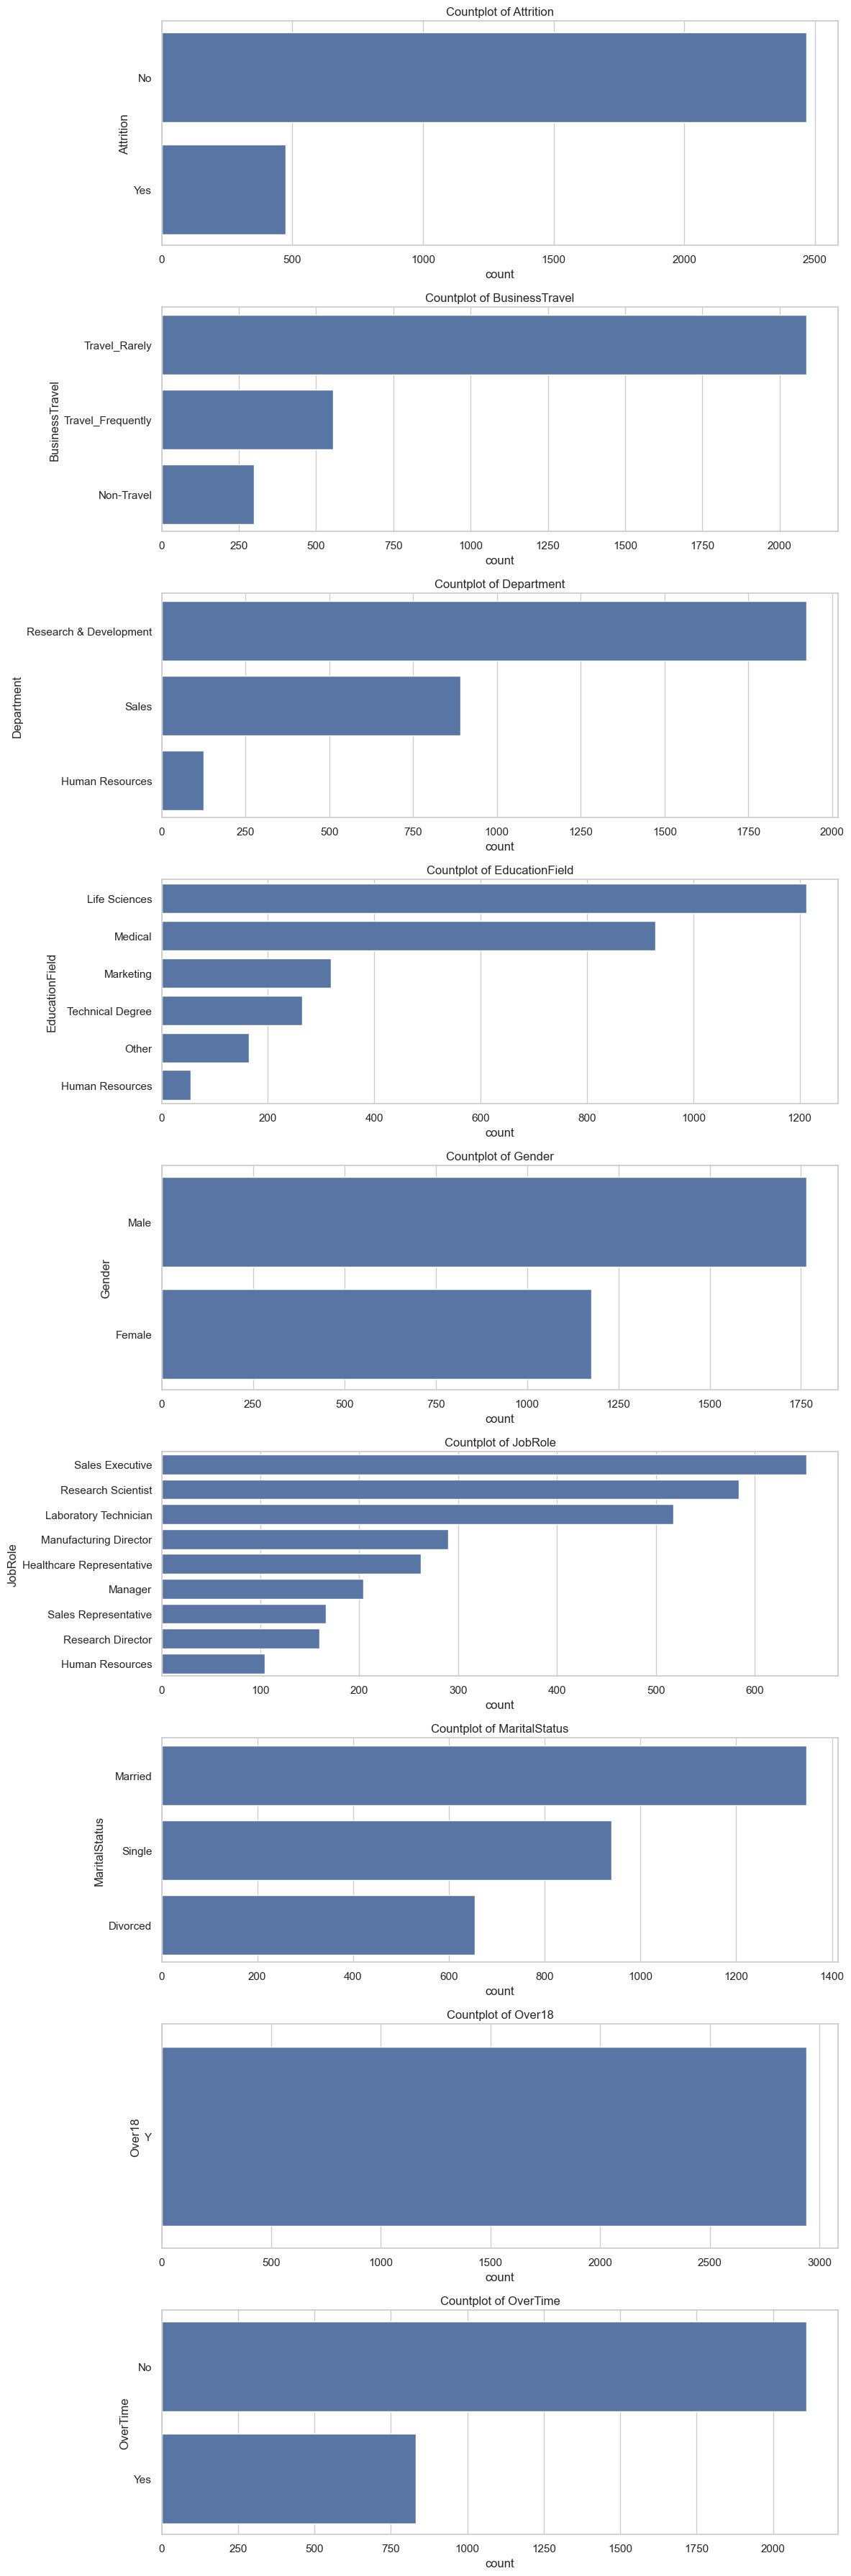

In [7]:
n = len(categorical_columns)

fig, ax = plt.subplots(n, 1, figsize=(12, 4 * n))

for i, col in enumerate(categorical_columns):
    sns.countplot(
        data=df_1,
        y=col,
        order=df_1[col].value_counts().index,
        ax=ax[i]
    )
    ax[i].set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()


(3) Lakukan EDA multivariat untuk pasangan kolom numerik dan kolom 'Attrition' pada employee.csv yang mencakup:<p>
    a. boxplot (atau variasinya) antara semua kolom numerik (axis y) dan kolom 'attrition' (axis x)<p>
    b. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

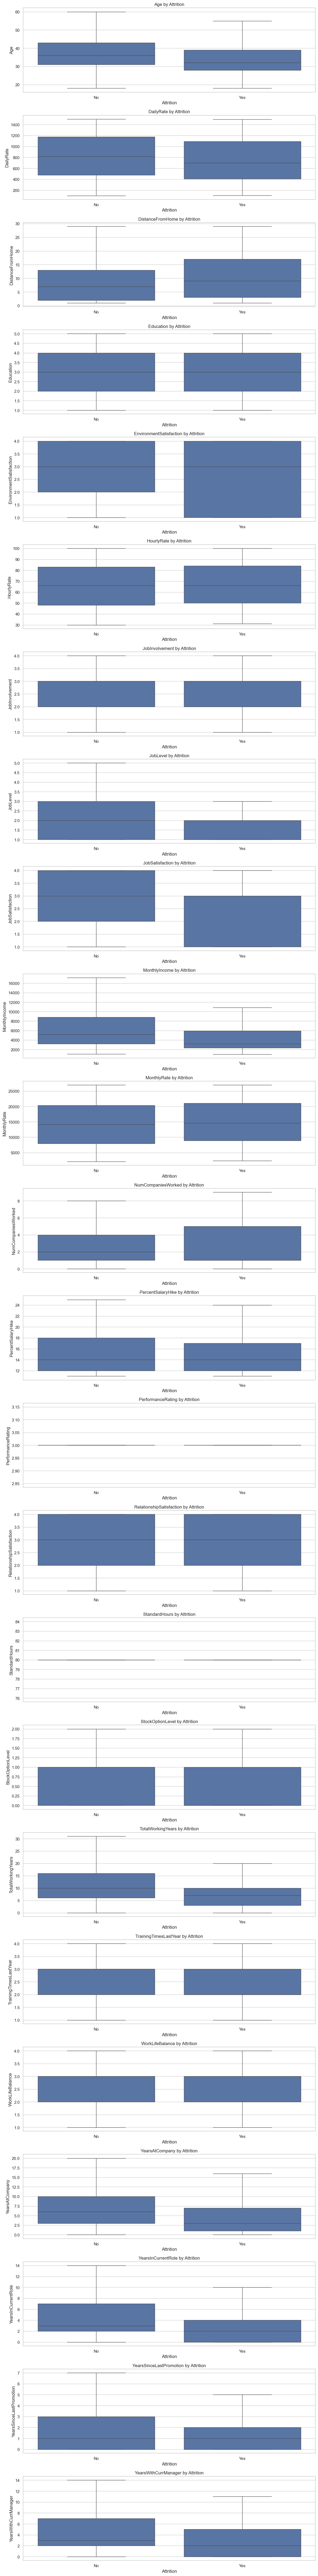

In [8]:
n = len(numeric_columns)

fig, ax = plt.subplots(n, 1, figsize=(12, 4 * n))
df_1["Attrition"] = df_1["Attrition"].astype("category")

for i, col in enumerate(numeric_columns):
    sns.boxplot(
        data=df_1,
        x="Attrition",
        y=col,
        order=df_1["Attrition"].value_counts().index,
        showfliers=False,
        ax=ax[i]
    )
    ax[i].set_title(f"{col} by Attrition")

plt.tight_layout()
plt.show()



(4) Lakukan EDA multivariat untuk pasangan kolom kategorikal dan kolom 'Attrition' pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue <p>
    b. stacked barplot yang menunjukkan proporsi value kolom 'Attrition' untuk masing-masing kategori pada semua kolom kategorikal (1 kolom kategorikal 1 plot, 1 plot berisi stacked bar sejumlah banyaknya kategori unik pada kolom kategori tersebut) <p>
        c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

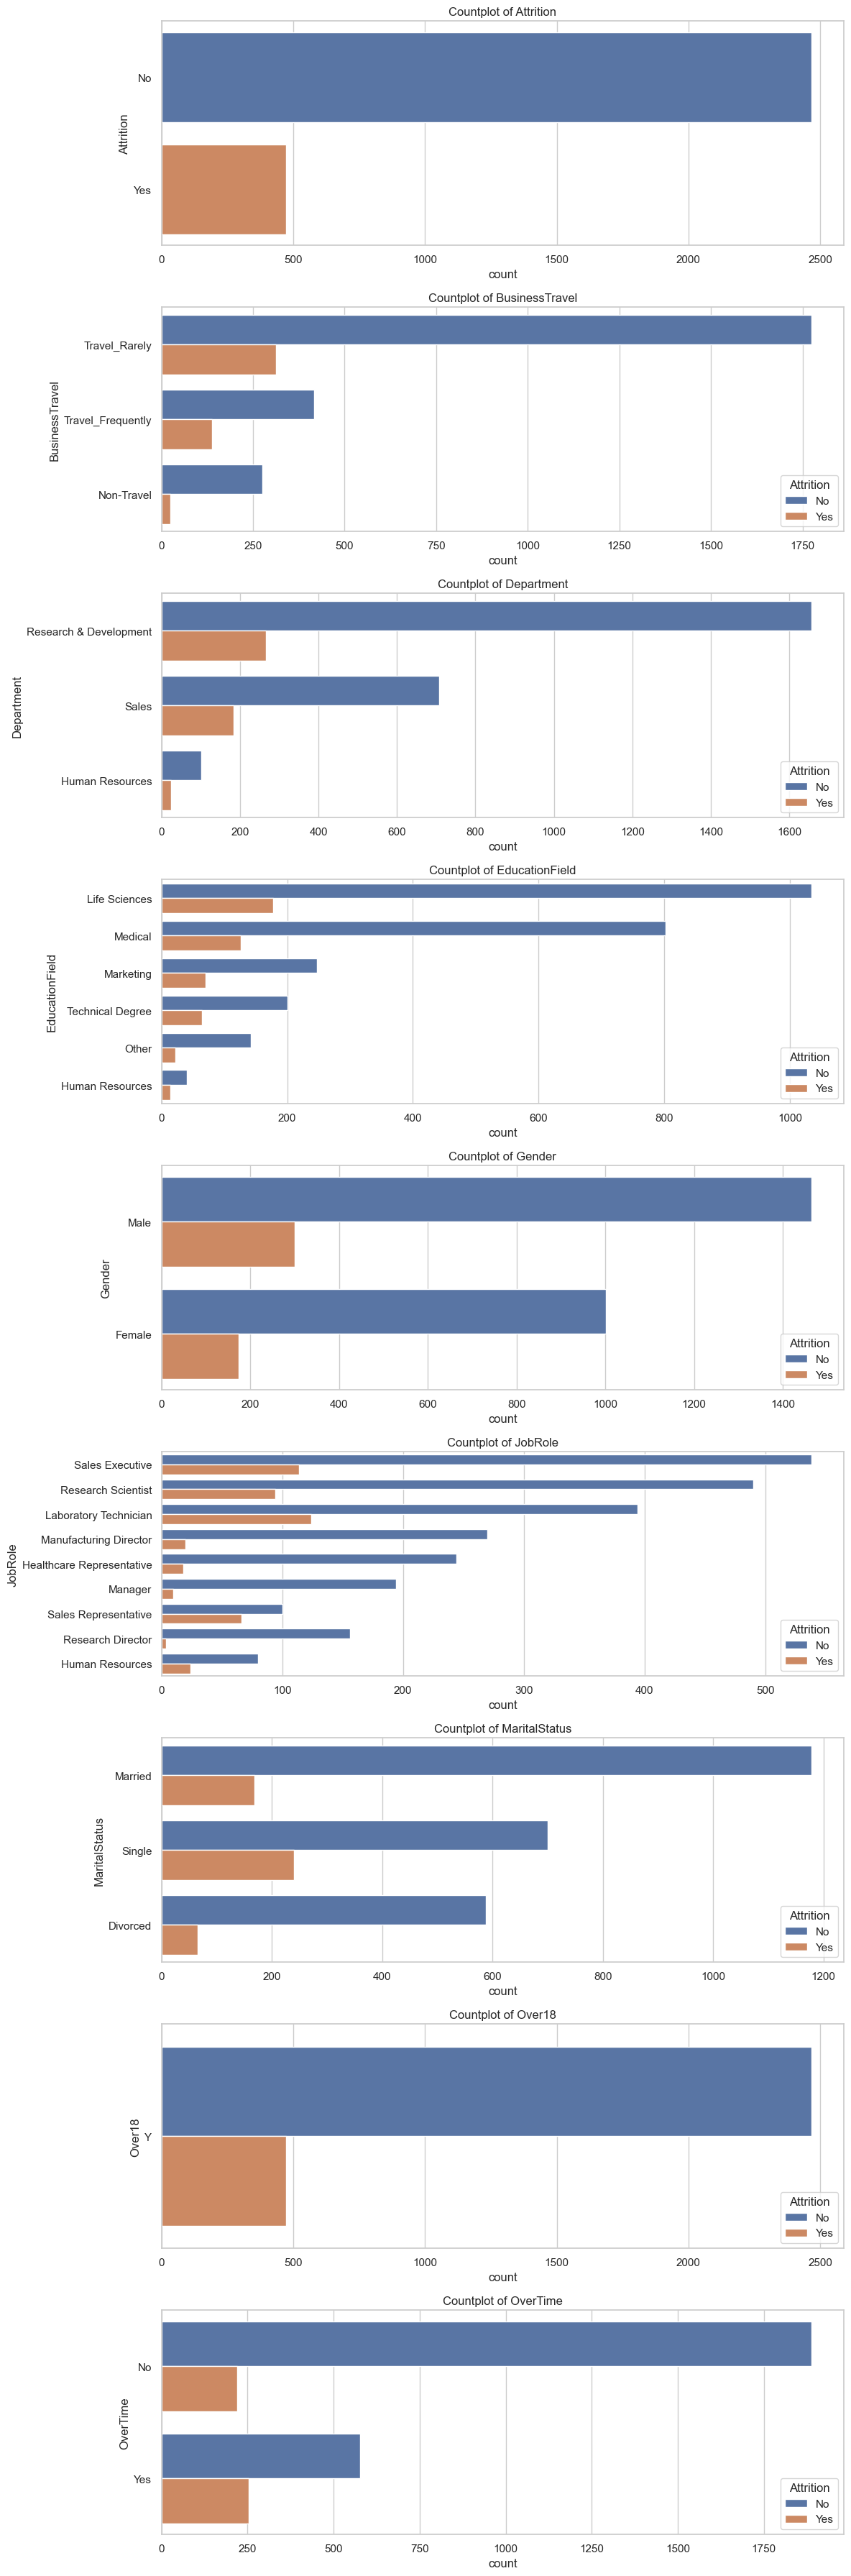

In [9]:
n = len(categorical_columns)

fig, ax = plt.subplots(n, 1, figsize=(12, 4 * n))

for i, col in enumerate(categorical_columns):
    sns.countplot(
        data=df_1,
        y=col,
        order=df_1[col].value_counts().index,
        ax=ax[i],
        hue='Attrition'
    )
    ax[i].set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

In [11]:
import plotly.express as px

for col in categorical_columns:
    df_ct = (
        df_1
        .groupby([col, "Attrition"])
        .size()
        .reset_index(name="count")
    )

    fig = px.bar(
        df_ct,
        x=col,
        y="count",
        color="Attrition",
        barmode="stack",
        title=f"Attrition by {col}"
    )

    fig.show()



C:\Users\COB\AppData\Local\Temp\ipykernel_8660\4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



ValueError: cannot insert Attrition, already exists

In [105]:
!pip install -U nbformat ipython

  Using cached fastjsonschema-2.21.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached jsonschema-4.26.0-py3-none-any.whl.metadata (7.6 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.37.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.30.0-cp314-cp314-win_amd64.whl.metadata (4.2 kB)
Using cached fastjsonschema-2.21.2-py3-none-any.whl (24 kB)
Using cached attrs-25.4.0-py3-none-any.whl (67 kB)
Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl (18 kB)
Using cached referencing-0.37.0-py3-none-any.whl (26 kB)
Using cached rpds_py-0.30.0-cp314-cp314-win_amd64.whl (228 kB)

   ---------------------------------------- 0/7 [fastjsonschema]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------------- ---------------------- 3/7 [referencing]
   -----------------------

(5) Lakukan independen t-test (2-sided) dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)<p>
    H1: Terdapat perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)<p>
        alpha = 5%<p>
            Print hasil t-test dan tuliskan kesimpulannya.

(6) Lakukan one-way ANOVA dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Age' antara karyawan dari 3 departemen yang ada di dataset<p>
    H1: Setidaknya terdapat 2 departemen yang mean umur karyawannya berbeda<p>
            Print hasil one-way ANOVA dan tuliskan kesimpulannya.

# Classification

(8) Persiapkan dataset untuk klasifikasi. Jadikan kolom 'Attrition' sebagai target (y). Drop semua kolom yang dianggap tidak diperlukan.

(9) Lakukan train test split, test:test = 4:1, stratify = y.

(10) Lakukan feature engineering yang dianggap diperlukan pada trainset: imputation, encoding, scaling, selection, dll. Lakukan transformasi serupa pada testset tanpa melakukan fitting kembali.

(11) Siapkan 3 estimator: lakukan cross-validation dengan estimator Logistic Regression, Decision Tree Classifier, dan XGBoost Classifier (apabila tidak bisa install xgboost silahkan pilih classifier lain untuk menggantikan) untuk menentukan nilai optimal untuk berbagai hyperparameter masing-masing estimator. 

(12) Fit ketiga estimator dengan trainset. Print classification report untuk trainset dan testset untuk ketiga estimator.

(13) Dari hasil performansi yang Anda dapatkan manakah estimator yang paling baik?

# Regression

(14) Persiapkan dataset untuk regresi. Jadikan kolom 'MonthlyIncome' sebagai target.

(15) Split trainset dan testset. test size = 0.2.

(16) Lakukan transformasi yang diperlukan pada trainset. Lakukan juga pada testset tanpa fitting ulang.

(17) Siapkan 2 regressor learning alg.: (1) linear/polynomial dan (2) decision tree/random forest/xgboost regressor. Dengan menggunakan cross validation tentukan hyperparamer optimal untuk kedua regressor.

(18) Print metrics r2, mse, rmse, mae, dan mape (dalam bentuk dataframe) trainset vs testset untuk kedua regressor. Manakah model yang lebih baik performance-nya?

# Clustering

(19) Lakukan transformasi yang diperlukan pada dataset employee

(21) Dengan menggunakan elbow method dan sillhouette score tentukan nilai k optimal untuk pembuatan model kmeans/kmedoids clustering

(22) Tambahkan 1 kolom 'label' pada dataset yang berisi nomor cluster untuk tiap row, berdasarkan model kmeans clustering yang telah dibuat.